In [1]:
import pandas as pd


In [80]:
df = pd.read_csv(r'./round1/prices_round_1_day_-2.csv',sep=';')
df2 = pd.read_csv(r'./round1/prices_round_1_day_-1.csv',sep=';')
df3 = pd.read_csv(r'./round1/prices_round_1_day_0.csv',sep=';')

In [81]:
df.head()
df = df.fillna(0)

In [82]:
squid_df = df2[df2['product'] == 'SQUID_INK'].reset_index(drop=True)

In [83]:
midPrices = squid_df['mid_price']


In [88]:
print(list(midPrices[-10:]))

[1971.0, 1971.0, 1971.5, 1969.0, 1970.5, 1971.5, 1973.0, 1972.5, 1973.5, 1972.0]


In [69]:
midPrices[0:4]

0    2005.5
1    2005.5
2    2004.5
3    2004.5
Name: mid_price, dtype: float64

In [70]:
import pandas as pd

def calculate_zscores(midPrices):
    zscores = []
    window_size = 5
    forecast_size = 3

    for i in range(0, len(midPrices) - window_size - forecast_size + 1):
        window = pd.Series(midPrices[i:i + window_size])
        mean = window.mean()
        std = window.std()

        for j in range(i + window_size, i + window_size + forecast_size):
            z = (midPrices[j] - mean) / std if std != 0 else 0
            zscores.append(z)

    return zscores


In [71]:
zscores = calculate(midPrices)

In [72]:
len(zscores)

9999

In [73]:
len(midPrices)

10000

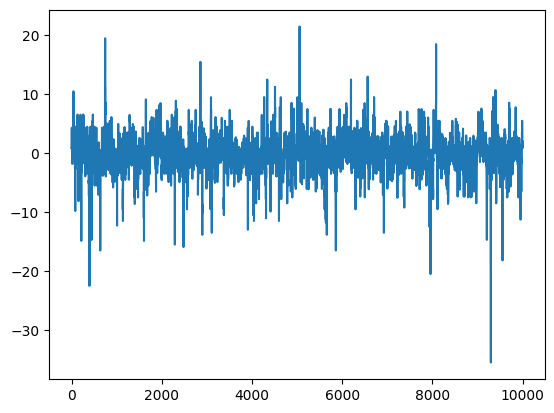

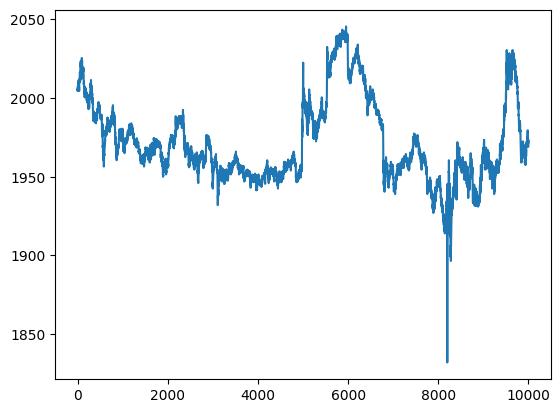

In [74]:
import matplotlib.pyplot as plt

zscores2 = [z for z in zscores]

plt.plot(range(len(zscores2)),zscores2)
plt.show()
plt.plot(range(len(midPrices)),midPrices)
plt.show()

In [75]:
squid_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
1,-1,100,SQUID_INK,2004,24,NaN,NaN,NaN,NaN,2007,24,NaN,NaN,NaN,NaN,2005.5,0.0
2,-1,200,SQUID_INK,2003,22,NaN,NaN,NaN,NaN,2006,20,NaN,NaN,NaN,NaN,2004.5,0.0
3,-1,300,SQUID_INK,2003,31,NaN,NaN,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2004.5,0.0
4,-1,400,SQUID_INK,2004,27,NaN,NaN,NaN,NaN,2007,27,NaN,NaN,NaN,NaN,2005.5,0.0


In [6]:
bvol1 = squid_df['bid_volume_1']
bvol2 = squid_df['bid_volume_2']
bvol3 = squid_df['bid_volume_3']
avol1 = squid_df['ask_volume_1']
avol2 = squid_df['ask_volume_2']
avol3 = squid_df['ask_volume_3']

In [7]:
import matplotlib.pyplot as plt 


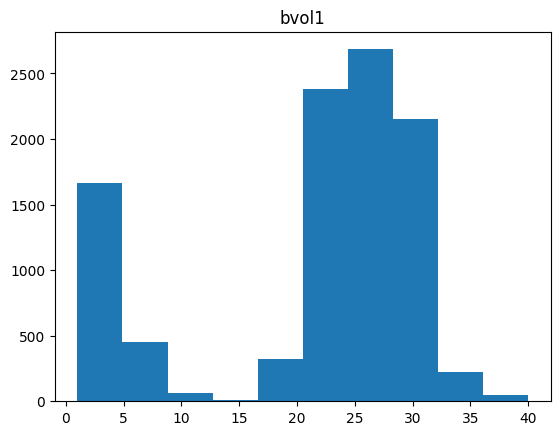

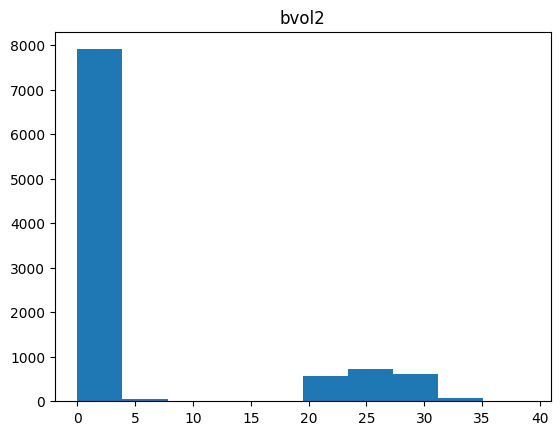

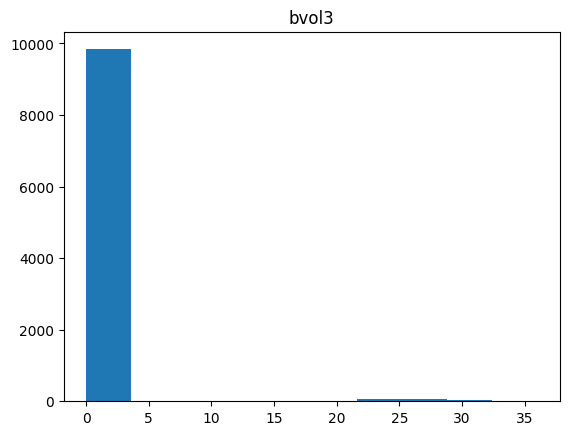

In [8]:
plt.hist(bvol1,label='bvol1')
plt.title('bvol1')
plt.show()
plt.hist(bvol2,label='bvol2')
plt.title('bvol2')
plt.show()
plt.hist(bvol3,label='bvol3')
plt.title('bvol3')
plt.show()

In [9]:
def getAvg(row):
    prices = []
    prices.append(row['bid_volume_1'])
    prices.append(row['bid_volume_2'])
    prices.append(row['bid_volume_3'])
    maxVol = prices.index(max(prices))
    bidColumn = 'bid_price_'+str(maxVol+1)
    bidPrice = row[bidColumn]
    prices = []
    prices.append(row['ask_volume_1'])
    prices.append(row['ask_volume_2'])
    prices.append(row['ask_volume_3'])
    maxVol = prices.index(max(prices))
    askColumn = 'ask_price_' + str(maxVol+1)
    askPrice = row[bidColumn]
    return int((bidPrice+askPrice)/2)
    

In [10]:
squid_df['fair price'] = squid_df.apply(lambda row: getAvg(row), axis=1)

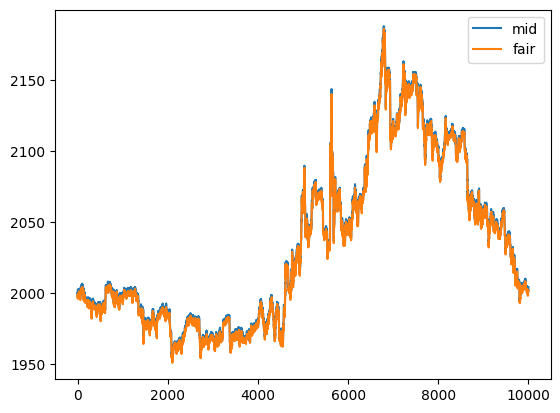

In [11]:
plt.plot(range(len(squid_df)),squid_df['mid_price'],label='mid')
plt.plot(range(len(squid_df)),squid_df['fair price'],label='fair')
plt.legend()
plt.show()

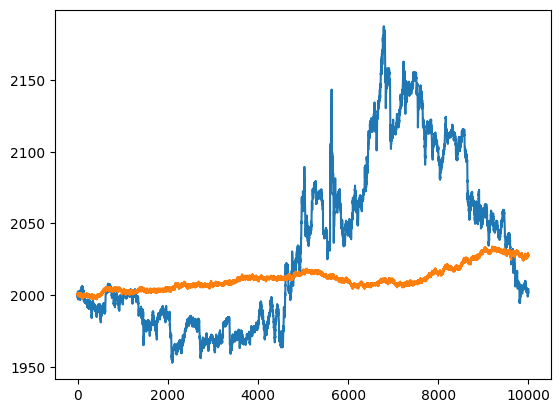

In [12]:
kelpPrices = df[df['product'] == 'KELP']['mid_price']
squidPrices = squid_df['mid_price']

plt.plot(range(len(squidPrices)),squidPrices)
plt.plot(range(len(kelpPrices)),kelpPrices)
plt.show()

In [13]:
df2 = pd.read_csv(r'./round1/prices_round_1_day_-1.csv',sep=';')

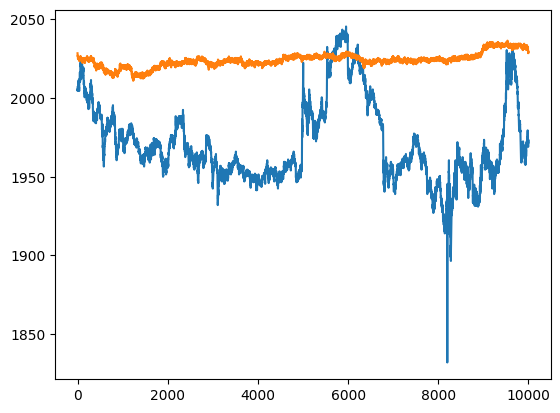

In [14]:
kelpPrices = df2[df2['product'] == 'KELP']['mid_price']
squidPrices = df2[df2['product'] == 'SQUID_INK']['mid_price']

plt.plot(range(len(squidPrices)),squidPrices)
plt.plot(range(len(kelpPrices)),kelpPrices)
plt.show()

In [15]:
df3 = pd.read_csv(r'./round1/prices_round_1_day_0.csv',sep=';')

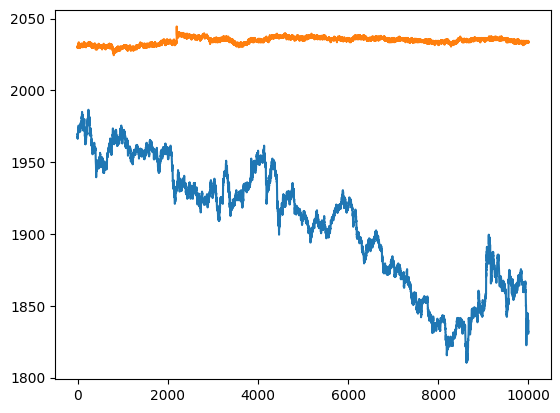

In [16]:
kelpPrices = df3[df3['product'] == 'KELP']['mid_price']
squidPrices = df3[df3['product'] == 'SQUID_INK']['mid_price']

plt.plot(range(len(squidPrices)),squidPrices)
plt.plot(range(len(kelpPrices)),kelpPrices)
plt.show()

In [17]:
squid_df2 = df2[df2['product'] == 'SQUID_INK'].reset_index(drop=True)
squid_df3 = df3[df3['product'] == 'SQUID_INK'].reset_index(drop=True)

In [23]:
kelp_df = df[df['product'] == 'KELP'].reset_index(drop=True)
kelp_df2 = df2[df2['product'] == 'KELP'].reset_index(drop=True)
kelp_df3 = df3[df3['product'] == 'KELP'].reset_index(drop=True)

In [24]:
squid_df['bid_price_1'].describe()

count    10000.000000
mean      2032.589200
std         58.206986
min       1951.000000
25%       1982.000000
50%       2013.000000
75%       2071.000000
max       2187.000000
Name: bid_price_1, dtype: float64

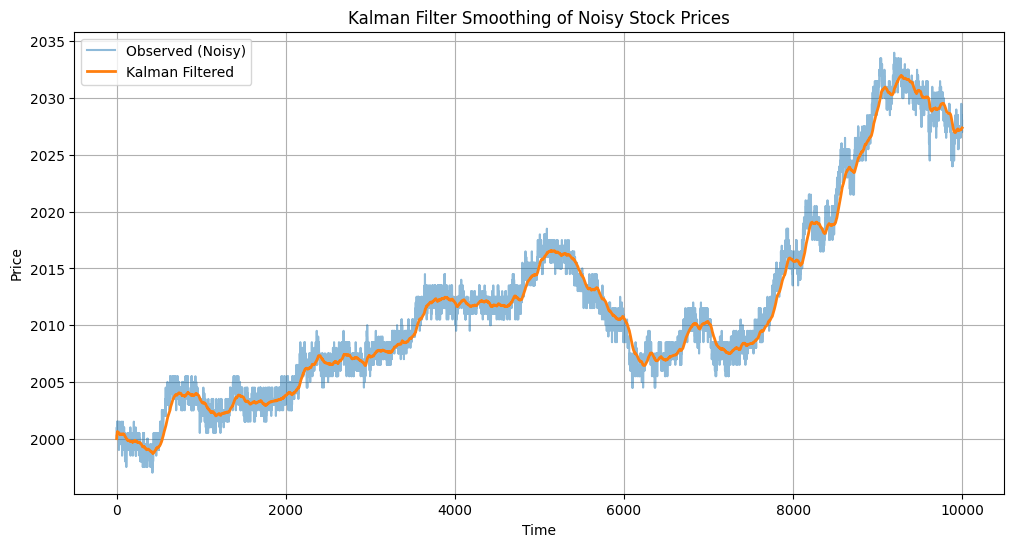

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fake stock price data
np.random.seed(0)
true_price = np.linspace(100, 120, 100)  # true trend
noise = np.random.normal(0, 2, size=100)  # market noise
observed_price = true_price + noise

#bid1 = squid_df['bid_price_1']
#ask1 = squid_df['ask_price_1']

observed_price = kelp_df['mid_price']
# Kalman Filter variables
n = len(observed_price)
predicted_price = np.zeros(n)

# Initial guesses
x = observed_price[0]     # initial estimate
P = 2                     # initial uncertainty
Q = 0.001                # process variance
R = 4                    # measurement variance

# Kalman filter loop
for t in range(n):
    # Prediction step
    x_pred = x
    P_pred = P + Q

    # Update step
    K = P_pred / (P_pred + R)  # Kalman Gain
    x = x_pred + K * (observed_price[t] - x_pred)
    P = (1 - K) * P_pred

    predicted_price[t] = x

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(observed_price, label='Observed (Noisy)', alpha=0.5)
plt.plot(predicted_price, label='Kalman Filtered', linewidth=2)
#plt.plot(bid1,label='Bid 1', alpha=0.5)
#plt.plot(ask1,label='Ask 1',alpha=0.5)
plt.legend()
plt.title('Kalman Filter Smoothing of Noisy Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [28]:
squid_df['mid_price'].iloc[0:10]


0    2000.0
1    2000.0
2    1998.5
3    1998.5
4    1998.0
5    1999.5
6    1999.0
7    2000.5
8    2002.5
9    2000.0
Name: mid_price, dtype: float64